<a href="https://colab.research.google.com/github/juanrassis/python_projects/blob/main/Optimising_Water_Resources_in_Ukraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTIMISING WATER RESOURCES IN UKRAINE**
---


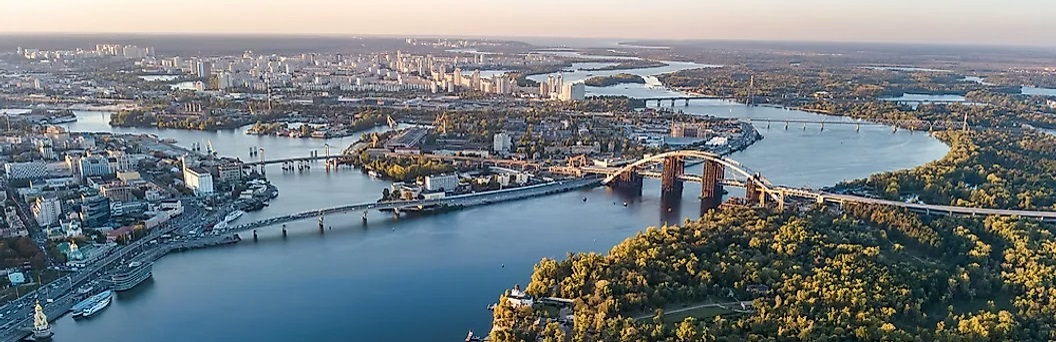

## **What to expect from this project?**

*   Data Cleaning and Pre-processing 
*   Geo-referencing and dataframe conversion
*   Multivariate Statistical Analysis
*   Geospatial Analysis

## **Context**

Welcome to my geospatial data analysis project on water resources in Ukraine.

Water is an essential resource for all of us, and it is especially important in Ukraine, a country with a range of challenges related to water. One of the key issues in Ukraine is the unequal distribution of water resources, with some regions experiencing shortages while others have an excess. 

In this project, I then aim to delve deeper into these challenges and explore potential opportunities for improvement and prioritisation of infrastructure resources. Therefore, by better understanding the complexities of water distribution in Ukraine, I hope to contribute to the development of more effective and sustainable water management strategies.

## **Table of Contents**

> 1.   **Preparation**
>>1.1   Python Libraries |
>>1.2   The Dataframe |
>>1.3   GeoJSON Basemap
> 2.   **Data Quality Check and Cleaning**
>>2.1   Diagnosticing data issues |
>>2.2   Dropping columns and rows |
>>2.3   Renaming columns
> 3.   **Geodata Pre-processing**
>>3.1   Producing Derived Data |
>>3.2   Reverse Geocoding |
>>3.3   GeoDataFrame
> 4.   **Exploration**
>>4.1   Summary Statistics |
>>4.2   Correlation Analysis
> 5.   **Regional Analysis**
>>5.1   Population Distribution |
>>5.2   Hydrographic Scenario |
>>5.3   Contamination Risk |
>>5.4   Action Plan
> 5.   **Conclusion**
> 6.   **References**

# **1.0 Preparation**
---



### 1.1 Python Libraries

In this notebook I'll be using a good variety of Python libraries that can make it easier to perform complex tasks and generate data visuals. So, first I need to install some packages not pre-existent on Google Colab using a package manager ("pip" command). And once I have all those set up, I can just import them into my notebook using the import keyword, followed by the name of the library.

In [1]:
! pip install --quiet kaggle # API to load Kaggle datasets directly into Google Colab
! pip install --quiet geopandas # library that provides a dataframe-like interface for manipulating and analysing geospatial data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.4 MB/s eta 0:00:00


In [2]:
# DATA PROCESSING
import pandas as pd # read csv file as a dataframe and wrangle the data
import numpy as np # linear algebra
from math import radians, sin, cos, sqrt, atan2 # calculate distances between coordinates [!!!]
import missingno as msno # identify missing data
from collections import Counter # count duplicates
from tqdm.notebook import tqdm # Progress bar and API request details

# GEOSPATIAL DATA
import geopandas as gpd # main GIS library
from geopy.geocoders import Nominatim # reverse geocoding
from shapely.geometry import Point, Polygon # generate spatial data

# DATA VISUALISATION
import matplotlib.pyplot as plt # multiple visualisations
import matplotlib.ticker as ticker # visual customisation
import seaborn as sns # correlation heatmap

### 1.2 The Dataframe

I'll be also accessing my [data source](https://www.kaggle.com/datasets/leekahwin/ukraine-waste-water-treatment-plants) from Kaggle using an application programming interface (API). And for that, I have to follow a set of rules and protocols that allow me to communicate with its servers. To access the dataset in the cloud using an API, I will be to providing my pre-uploaded authentication credentials, which allow me to access and read the data as a Pandas data frame.

In [3]:
! mkdir ~/.kaggle # Making a directory named “.kaggle”
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json # Copying the “kaggle.json” from my mounted cloud drive into this new directory
! chmod 600 ~/.kaggle/kaggle.json # Allocating the required permission for this file
! kaggle datasets download -d leekahwin/ukraine-waste-water-treatment-plants # Downloading the dataset (which comes with a zip extension)
! unzip /content/ukraine-waste-water-treatment-plants.zip # Unzipping the file to extract the data

  0% 0.00/11.9k [00:00<?, ?B/s]
100% 11.9k/11.9k [00:00<00:00, 8.59MB/s]
Archive:  /content/ukraine-waste-water-treatment-plants.zip
  inflating: HydroWASTE_Ukraine_extract.csv  


In [4]:
# Importing, reading a csv file as a Pandas DataFrame and initially assigning it to an initial variable called 'RawDataframe'
RawDataframe = pd.read_csv('/content/HydroWASTE_Ukraine_extract.csv') 

# Printing the first 3 and last 2 rows of the data frame
RawDataframe.head(3).append(RawDataframe.tail(2)) 

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LATITUDE,LONGITUDE,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,2248,1,1279514,Strzyzow,Ukraine,UKR,50.841,24.031,2,50.840,...,1,Secondary,1,3.618801e+07,20352809,40.163,0,0,2500.0,2
1,56448,12,3598,NaN,Ukraine,UKR,44.396,33.977,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
2,56449,12,3599,NaN,Ukraine,UKR,44.410,34.021,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
310,57030,12,4180,NaN,Ukraine,UKR,51.826,26.124,1,51.831,...,4,Secondary,2,3.791562e+03,20327161,53.894,0,0,NaN,3
311,57032,12,4182,NaN,Ukraine,UKR,51.864,33.426,1,51.906,...,4,Secondary,2,2.006500e+01,20326166,1.537,0,0,NaN,3


### 1.3 GeoJSON Basemap

Besides the main data being analysed, I will require a GeoJSON basemap of Ukraine, since without it, the data points will be plotted on a blank or default map that hardly provides any useful context or spatial reference. These basemaps are pre-made geographic datasets in the GeoJSON format that can be used as a background map for visualizing geospatial data and they can be found online on free open sources like the one I got and pre-uploaded from [Cartography Vectors](https://cartographyvectors.com/map/1530-ukraine-with-regions).

In [5]:
# Importing, reading a csv file as a GeoPandas DataFrame and initially assigning it to an variable called 'Basemap'
Basemap = gpd.read_file('/content/drive/MyDrive/Academic/IT/Projects/MASTERProjects/UkraineProject/UkraineBasemap.geojson')

Basemap.head(3).append(Basemap.tail(2)) 

,id,name,density,path,geometry
0,5656,Autonomous Republic of Crimea,0,/world/Ukraine/Autonomous Republic of Crimea,"POLYGON ((34.97755 45.76285, 35.04443 45.67004..."
1,5653,Cherkasy Oblast,0,/world/Ukraine/Cherkasy Oblast,"POLYGON ((32.07941 50.23724, 32.08917 50.23785..."
2,5654,Chernihiv Oblast,0,/world/Ukraine/Chernihiv Oblast,"POLYGON ((33.29431 52.35727, 33.35895 52.35754..."
23,5676,Zaporizhia Oblast,0,/world/Ukraine/Zaporizhia Oblast,"POLYGON ((35.51474 48.07938, 35.52188 48.07938..."
24,5677,Zhytomyr Oblast,0,/world/Ukraine/Zhytomyr Oblast,"POLYGON ((28.34688 51.52515, 28.35963 51.52936..."


# **2.0 Data Quality Check and Cleaning**
---



It looks like there's a lot in this dataset that I won't be needing and some key data that isn't contained here. So, I'll have a little work to pre-process it before I can start a proper exploration of the content.

I'll have to identify and address any errors, inconsistencies, or missing values in the data, and ensure that the it is accurate, consistent, and as much complete as it is possible to be, so it easier to perform my analyses and interpret the results further down the project. And for this, I'll be going through the cleaning process both manually, by reviewing the data by eye and using codes and algorithms when necessary.

### 2.1 Diagnosticing data issues

In [6]:
# Checking duplicate records
counts = dict(Counter(RawDataframe['WASTE_ID'])) # Counting by treatment plant IDs
duplicates = {key:value for key, value in counts.items()
                            if value > 1} # Fetching only counts above the number 2.
duplicates

{}

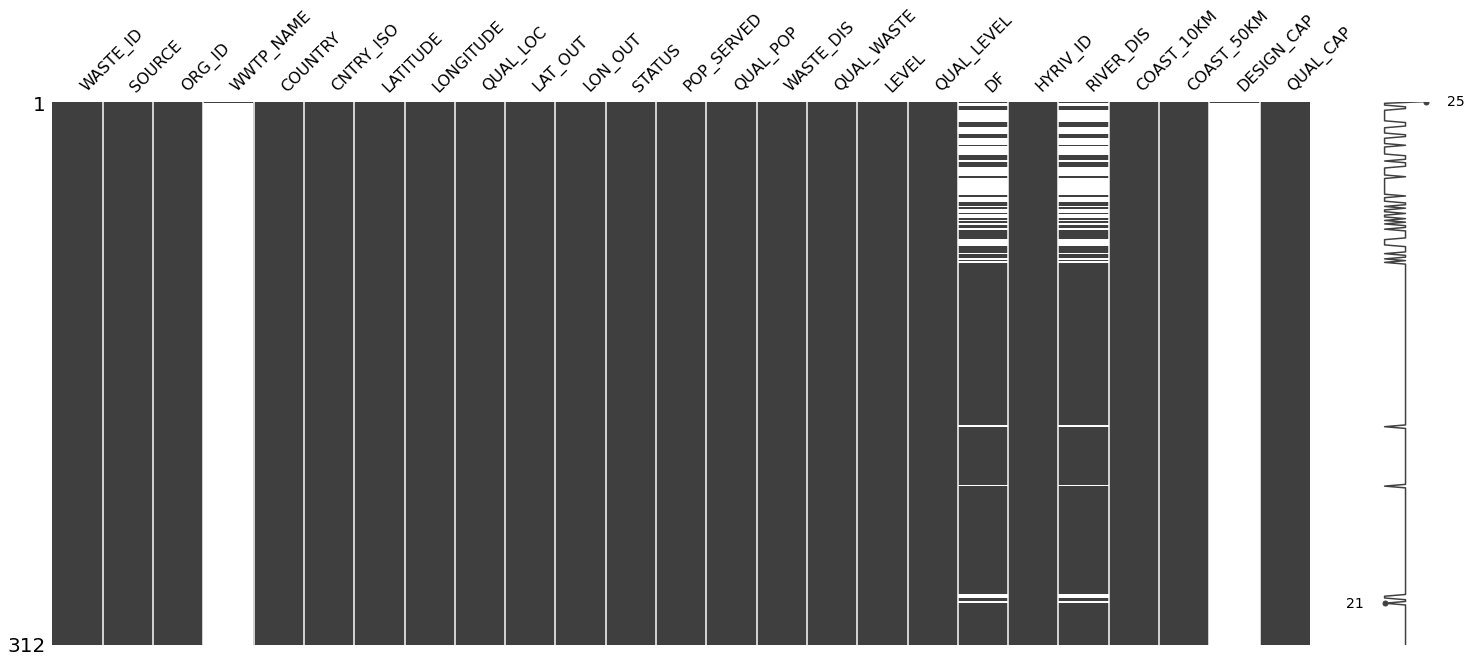

In [7]:
# MATRIX PLOT (Visualising the distribution of missing data)
# When data is present, the plot is shaded in grey, and when it is absent the plot is displayed in white.
msno.matrix(RawDataframe)

COMMENT OF RESULTS:
>*   No duplicate records, it appears.
>*   There is no data in the WWTP_NAME and DESIGN_CAP columns, except for one strange row to be checked. So far, though, they will have to be all removed.
>*   A direct correlation between the missing values in the DF and RIVER_DIS columns can be easily seen in this image. This will require further assessment to decide whether I remove or fill in the gaps.

### 2.2 Dropping columns and rows

In [8]:
# [COLUMNS]
# I decided to remove columns one by one instead of a direct selection of the columns to be used in my analysis
## because I want to keep records of the reasons for not using the each of them if I want to go back later.
Dataframe = RawDataframe.drop([
    'WWTP_NAME', 'DESIGN_CAP', # Columns missing over 95% of its data
    'SOURCE', 'COUNTRY', 'CNTRY_ISO', 'STATUS', 'LEVEL', # Columns containing 1 unique value
    'QUAL_LOC', 'QUAL_POP', 'QUAL_WASTE', 'QUAL_LEVEL', 'QUAL_CAP', # Quality check columns not relevant for this analysis
    'ORG_ID', 'HYRIV_ID' # Other non-relevant columns
                              ], axis=1)
# [ROWS]
# I noticed that the first row [0] countained records from the WWTP Strzyzow (WASTE ID 2248)
## which is actually located in east Poland, +70km away from the Poland-Ukraine border.
Dataframe.drop(0, inplace=True)

Dataframe.head(1)

,WASTE_ID,LATITUDE,LONGITUDE,LAT_OUT,LON_OUT,POP_SERVED,WASTE_DIS,DF,RIVER_DIS,COAST_10KM,COAST_50KM
1,56448,44.396,33.977,44.39,33.96,22412,1865.016,NaN,NaN,1,1


### 2.4 Renaming columns

I decided to rename the columns to facilitate a better reading and understanding of the codes written from this section now on.

In [9]:
Dataframe.rename(columns={
    'WASTE_ID': 'WWTP_ID', # ID of each wastewater treatment plant (WWTP).
    'POP_SERVED': 'POPULATION_SERVED', # Size of the population served by the WWTP.
    'DF': 'DILUTION_FACTOR', # Estimated dilution factor.
    'WASTE_DIS' : 'WASTEWATER_DISCHARGED', # Treated wastewater discharged by the WWTP in m3.
    'RIVER_DIS' : 'RIVER_DISCHARGED', # Estimated the volume of water flowing through a river channel at the WWTP outfall location in m3.
    'LATITUDE': 'LATITUDE_WWTP', # Latitude of reported WWTP location.
    'LONGITUDE': 'LONGITUDE_WWTP', # Longitude of reported WWTP location.
    'LAT_OUT': 'LATITUDE_OUTFALL', # Latitude of the estimated outfall location.
    'LON_OUT': 'LONGITUDE_OUTFALL' # Longitude of the estimated outfall location.
                         }, inplace=True)
Dataframe.head(1)

,WWTP_ID,LATITUDE_WWTP,LONGITUDE_WWTP,LATITUDE_OUTFALL,LONGITUDE_OUTFALL,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,COAST_10KM,COAST_50KM
1,56448,44.396,33.977,44.39,33.96,22412,1865.016,NaN,NaN,1,1


# **3.0 Geodata Pre-processing**
---




### 3.1 Producing Derived Data

**[COASTAL_DISTANCE]**

The COAST_10KM and COAST_50KM columns follow a Boolean methodology to estimate the distance from a WWTP outfall location to the ocean or lake larger than 500km2. In this, values of 0 represent False whereas values of 1 represent True for claims that a particular outfall is within the stated distance (see the image below for better understanding).

Thereupon, to bring this concept to a higher-level language, the logic values of the two columns will be combined to form a categorical group of distances in string format that is easier to understand by all types of audiences.

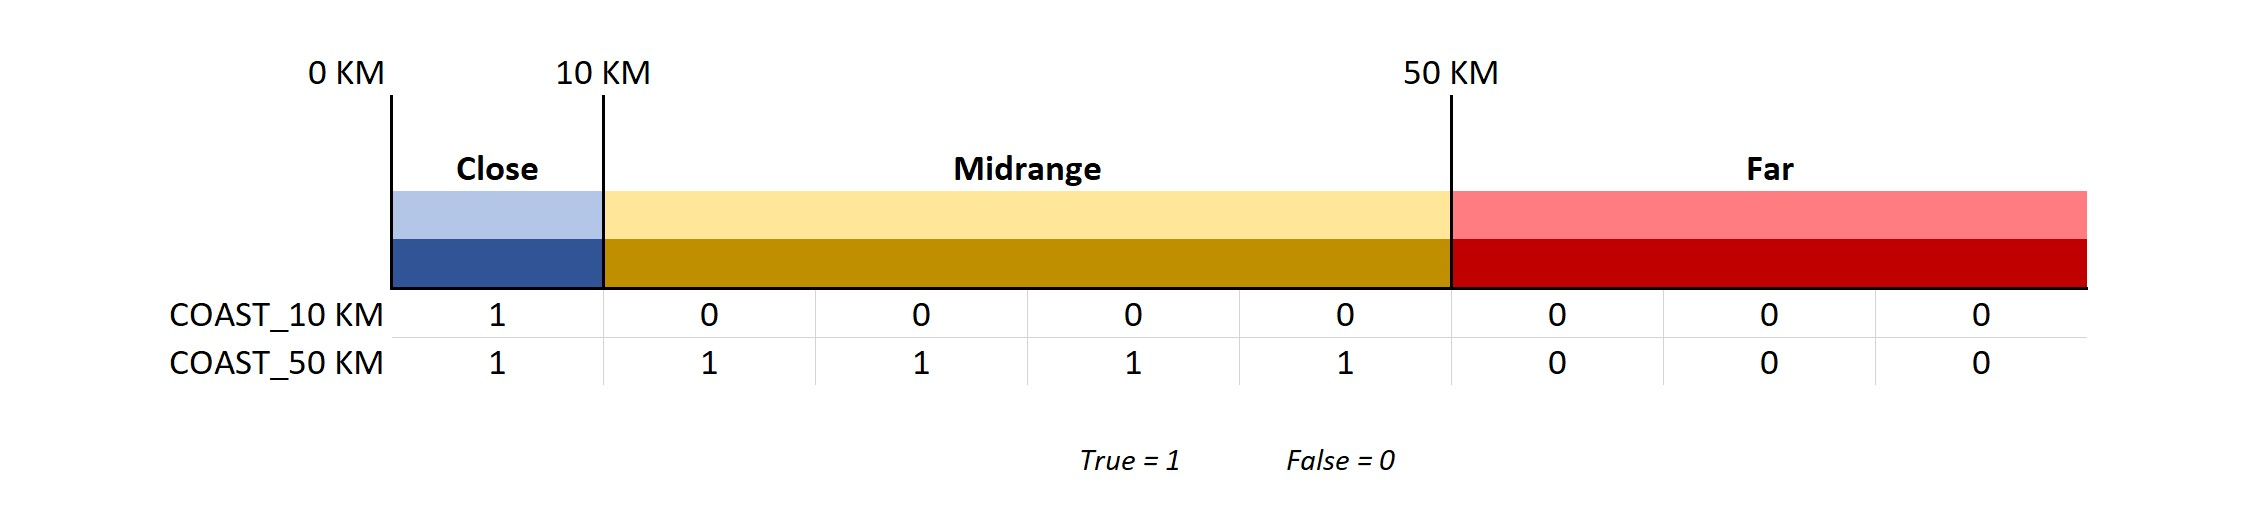

In [10]:
# Creating the conditions
conditions = [
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 0), # Far
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 1), # Midrange
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 1), # Close
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 0), # Error (if existent)
             ]
values = ['Far', 'Midrange', 'Close', 'Error'] # Creating the category names
Dataframe['COASTAL_DISTANCE'] = np.select(conditions, values) # Assembling them into a new column
Dataframe.drop(['COAST_10KM', 'COAST_50KM'], axis=1, inplace=True) # Deleting these two columns because they are not necessary anymore.
np.unique(Dataframe['COASTAL_DISTANCE'], return_counts=True) # Counting the elements' frequency to verify the presence of errors

(array(['Close', 'Far', 'Midrange'], dtype=object), array([ 61, 195,  55]))

**[RISK_SCORE]**

Moreover, to take into account the various factors that may contribute to the water management situation in Ukraine, I will be consolidating some key attributes into a single risk score to aid in the decision-making process of allocating resources and targeting areas where they can have the greatest impact on a larger number of people. This score is determined by simply dividing the population served by the dilution factor, which is also calculated using the volume of river discharge and treated wastewater.
```
Risk Score =   Population Served ÷ Dilution Factor
```
*   A higher risk score suggests that there is a lower volume of river water available to dilute the volume of treated wastewater produced, potentially increasing the risk of contamination to the water supplied to downstream populations.
*   In contrast, a lower risk score indicates that there is a higher volume of river water available to dilute this treated wastewater, thus decreasing the risk of contamination.

In [11]:
# Creating the risk score through a lambda function
Dataframe = Dataframe.assign(RISK_SCORE=lambda x: (x['POPULATION_SERVED'] / x['DILUTION_FACTOR']) / 10)

# Binning a variable with uneven distribution and specifying the labels
bins = pd.cut(Dataframe['RISK_SCORE'], bins=4, labels=['All Others', 'High', 'Very High','Extreme High'])

# Sampling some of the score data for observation
Dataframe.groupby(bins).agg({'WWTP_ID': 'count', 'POPULATION_SERVED': 'mean', 'DILUTION_FACTOR': 'mean', 'RISK_SCORE': 'mean'}
                      ).rename(columns={'WWTP_ID': 'Count Of WWTPs', 'POPULATION_SERVED': 'Average Population Served', 
                                        'DILUTION_FACTOR': 'Average Dilution Factor', 'RISK_SCORE': 'Average Risk Score'}
                      ).sort_values('Average Risk Score', ascending=False).astype(int)

,Count Of WWTPs,Average Population Served,Average Dilution Factor,Average Risk Score
RISK_SCORE,,,,
Extreme High,1,185432,2,7910
Very High,3,507365,11,4864
High,9,169865,6,2509
All Others,237,47916,19254,137


I could start getting some interesting insights from this score already, but I will come back to this score only further down in my analysis.

### 3.2 Reverse Geocoding

Because of the lack of data on names for the treatment plants or the regions in which they are located in, I found it necessary to make use of an API to convert their coordinates (latitude and longitude) and assign them to human-readable place names to provide more geographical context and additional information about the locations involved in the analysis. Also, it enables me to match my DataFrame to the GeoDataFrame through the regions names (if needed) and provide some insights using aggregation.

Therefore, I will be generating a column for the macroregions (states and capital city) and the microregions of each WWTP. The data classification for these microregions can vary a lot due to poor Ukranian geodata provided by most of the available APIs I tried to use (Google, OpenStreetMap...), so I will emcompass names of villages, towns, cities, municipalities, boroughs, counties, and districts, with the purpose of just to approximately narrowing down the geographical context from a national to a regional level.

[PART 1: SOURCING]

In [12]:
tqdm.pandas() # Generating a progress bar with details about iteration performance of the code
locator = Nominatim(user_agent='Google', timeout=10) #  Creating a geocoder object

# Function for reverse geocoding to extract data based on key-words
def georeverse (row):
    coordinates = f"{row['LATITUDE_WWTP']}, {row['LONGITUDE_WWTP']}"
    location = locator.reverse(coordinates, language='en', exactly_one=True)
    # Keyword-based extraction
    address = location.raw['address']
    village = address.get('village', '')
    town = address.get('town', '')
    city = address.get('city', '')
    municipality = address.get('municipality', '')
    borough = address.get('borough', '')
    county = address.get('county', '')
    district = address.get('district', '')
    macroregion = address.get('state', '')
    # Row iteration for each created column
    row['VILLAGE'] = village
    row['TOWN'] = town
    row['CITY'] = city
    row['MUNICIPALITY'] = municipality
    row['BOROUGH'] = borough
    row['COUNTY'] = county
    row['DISTRICT'] = district
    row['MACROREGION'] = macroregion
    return row
Dataframe = Dataframe.progress_apply(georeverse, axis=1)

  0%|          | 0/311 [00:00<?, ?it/s]

[PART 2: COMBINING EXTRACTED DATA]

The priority of overlaying data here will follow a rule aimed at generating as many unique values as possible. So it will follow the order according to the formula below, with the columns overlapping from top to bottom (or from left to right in the data frame).

In [13]:
def combine_columns (row): # Function to create a new column combined from other columns
  if row['VILLAGE'] != '':
    return row['VILLAGE']
  elif row['TOWN'] != '':
      return row['TOWN']
  elif row['CITY'] != '':
      return row['CITY']
  elif row['MUNICIPALITY'] != '':
      return row['MUNICIPALITY']
  elif row['BOROUGH'] != '':
      return row['BOROUGH']
  elif row['COUNTY'] != '':
      return row['COUNTY']
  else:
    return row['DISTRICT']
Dataframe['MICROREGION'] = Dataframe.apply(combine_columns, axis=1)

Dataframe[['VILLAGE', 'TOWN', 'CITY', 'MUNICIPALITY', 'BOROUGH', 'COUNTY', 'DISTRICT', 'MICROREGION', 'MACROREGION']] # displaying the result

,VILLAGE,TOWN,CITY,MUNICIPALITY,BOROUGH,COUNTY,DISTRICT,MICROREGION,MACROREGION
1,,Katsiveli,,,,городской округ Ялта,,Katsiveli,Republic of Crimea
2,,Simeiz,,,,городской округ Ялта,,Simeiz,Republic of Crimea
3,Tylovoe,,Орлиновский округ,,,,,Tylovoe,Sevastopol
4,Shyrokoe,,Орлиновский округ,,,,,Shyrokoe,Sevastopol
5,,Otradnoe,,,,городской округ Ялта,,Otradnoe,Republic of Crimea
...,...,...,...,...,...,...,...,...,...
307,,,,Shatsk Settlement Hromada,,,Kovel Raion,Shatsk Settlement Hromada,Volyn Oblast
308,,Slavutych,,Slavutych Urban Hromada,,,Vyshhorod Raion,Slavutych,Kyiv Oblast
309,,Korop,,Коропська селищна громада,,,Novhorod-Siverskyi Raion,Korop,Chernihiv Oblast
310,,Zarichne,,Zarichne Settlement Hromada,,,Varash Raion,Zarichne,Rivne Oblast


[PART 3: CLEANING]

As I expected, some of the data extracted will need some manual adjustments.

In [14]:
# Typo ajustment to match the basemap name
Dataframe.loc[(Dataframe['MACROREGION'] == 'Kyiv Oblast'),['MACROREGION']] = 'Kiev Oblast'
Dataframe.loc[(Dataframe['MACROREGION'] == 'Odesa Oblast'),['MACROREGION']] = 'Odessa Oblast'

# I also spotted one of the WWTPs with a state named 'Lublin Voivodeship', which is located on
## the border of Poland with the Volyn Oblast (UKR), despite the WWTP being classified as Ukrainian.
Dataframe.loc[(Dataframe['MACROREGION'] == 'Lublin Voivodeship'),['MACROREGION']] = 'Volyn Oblast'

# There are duplicate classifications for the Crimean region, so I'll use it for basemap name version.
## Also, to follow the basemap classification, I'll assign Sevastopol's locations to the Crimean Peninsula
Dataframe.loc[(Dataframe['MACROREGION'] == 'Republic of Crimea'),['MACROREGION']] = 'Autonomous Republic of Crimea'
Dataframe.loc[(Dataframe['MACROREGION'] == 'Sevastopol'),['MACROREGION']] = 'Autonomous Republic of Crimea'

# The records here refer for the capital city of Kyiv located in the Kiev Oblast
Dataframe.loc[(Dataframe['MACROREGION'] == '') & (Dataframe['MICROREGION'] == 'Kyiv'),['MACROREGION']] = 'Kiev Oblast'

# Some WWTPs in the Crimean Peninsula did not have any data, so I'm tracking those based on coordination limits
## for the area to assign the macroregion. But microregions will remain as uknown because they are in desolate areas.
Dataframe.loc[(Dataframe['LONGITUDE_WWTP'] >= 32.5) & (Dataframe['LONGITUDE_WWTP'] <= 36.6
           ) & (Dataframe['LATITUDE_WWTP'] >= 44.4) & (Dataframe['LATITUDE_WWTP'] <= 45.5
            ) & (Dataframe['MACROREGION'] == '') & (Dataframe['MICROREGION'] == ''
              ), ['MACROREGION']] = 'Autonomous Republic of Crimea'
Dataframe.loc[(Dataframe['MACROREGION'] == 'Autonomous Republic of Crimea') & (Dataframe['MICROREGION'] == ''), ['MICROREGION']] = 'Unknown'

# And after all that, I can discard any columns not anymore necessary
Dataframe = Dataframe.drop(['VILLAGE', 'TOWN', 'CITY', 'MUNICIPALITY', 'BOROUGH', 'COUNTY', 'DISTRICT'], axis=1)

COMMENT ON RESULTS:

>*   For the scope of this analysis only, I am satisfied with the amount of data gathered. Since the purpose of this section is just to provide additional context to analysis generated from other key data.








### 3.3 GeoDataFrame

A GeoDataFrame is a tabular data structure that contains a GeoSeries, which is similar to a Pandas DataFrame but with a geometry column for storing geometry data such as points, lines, and polygons. This column is generated by converting the spatial data (latitude and longitude) in the DataFrame to a format that can be used by a geometry library (GeoPandas), usually involving the creation of a geometry object and storing it in the column. This will then allow me to perform spatial operations on the data, such as calculating intersecting points and polygons, and more. 

[PART 1: GEOMETRY COLUMN]

In [15]:
geometry = [Point(xy) for xy in zip(Dataframe['LONGITUDE_WWTP'], Dataframe['LATITUDE_WWTP'])] # Zipping Lat(x) and Lon(y) into one
Dataframe = gpd.GeoDataFrame(Dataframe, crs = 'epsg:4326', geometry = geometry) # Defining GeoDataFrame through a coordinate system
Dataframe[['LONGITUDE_WWTP', 'LATITUDE_WWTP', 'geometry']].head(1)

,LONGITUDE_WWTP,LATITUDE_WWTP,geometry
1,33.977,44.396,POINT (33.97700 44.39600)


[PART 2: SPATIAL JOIN]

Moreover, I will be performing a spatial join to combine data from two my main data frame and the basemap based on their spatial relationship by finding all the points in the data frame that are within a certain polygon in the basemap. This can be useful for visualizing the statistical data on the map or for performing further spatial analyses.

In [16]:
Dataframe['name'] = Dataframe['MACROREGION'].copy() # Copying 'MACROREGION' values to 'name' column to use as key for intersecting data frames
GeoJoin = pd.merge(Dataframe, Basemap, on='name') # Merging the two dataframes on the 'name' column
GeoJoin.set_geometry('geometry_y', inplace=True, crs='epsg:4326') # Defining 'geometry_y' as the new geometry column using a coordinate system
GeoJoin.head(2)

,WWTP_ID,LATITUDE_WWTP,LONGITUDE_WWTP,LATITUDE_OUTFALL,LONGITUDE_OUTFALL,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,COASTAL_DISTANCE,RISK_SCORE,MACROREGION,MICROREGION,geometry_x,name,id,density,path,geometry_y
0,56448,44.396,33.977,44.39,33.96,22412,1865.016,NaN,NaN,Close,NaN,Autonomous Republic of Crimea,Katsiveli,POINT (33.97700 44.39600),Autonomous Republic of Crimea,5656,0,/world/Ukraine/Autonomous Republic of Crimea,"POLYGON ((34.97755 45.76285, 35.04443 45.67004..."
1,56449,44.410,34.021,44.39,33.96,32052,2667.200,NaN,NaN,Close,NaN,Autonomous Republic of Crimea,Simeiz,POINT (34.02100 44.41000),Autonomous Republic of Crimea,5656,0,/world/Ukraine/Autonomous Republic of Crimea,"POLYGON ((34.97755 45.76285, 35.04443 45.67004..."


[PART 3: DATA AGGREGATION]

Additionally, by aggregating the joined spatial data, the analysis can be scaled from the level of individual treatment plants to a macro-regional level. This enables a more comprehensive understanding of how various factors such as population size and river discharge may be impacting the effectiveness of the nation's wastewater treatment infrastructure.

In [17]:
GeoJoin_Sum = GeoJoin.groupby('name').agg('sum') # Grouping the total of the population served by macroregion
GeoJoin_Sum = pd.merge(GeoJoin_Sum, Basemap, on='name') # Merging the aggregated data with the Basemap
GeoJoin_Sum = gpd.GeoDataFrame(GeoJoin_Sum) # Converting the resulting dataframe back to a GeoDataFrame

# **4.0 Exploration**
---




After being done will all pre-processing requirements, I'll conduct a basic exploration as a first step on the analysis, which is designed to provide a broad overview of the data and identify potential patterns and trends.

This will involve techniques, such as summary statistics to understand the central tendency of values, multivariate correlation to calculate the relationship between multiple variables, and using plots to identify clusters or groups within the data.

### 4.1 Summary Statistics

But first, I have to deal with those missing values spotted earlier on in the **2.1 Diagnosticing data issues**. But, since I'm working with spatial data, I believe I must be inclusive of all data contained in the dataframe, as even outliers can actually represent important spatial patterns or trends that could be lost if removed.

Therefore, I will be referring here to the scientific study by [Ehalt Macedo, et al. (2022)](https://essd.copernicus.org/articles/14/559/2022/#section4) which assigned infinite values for dilution factors where the outfall location ranges within 10km and coincides with the ocean or a large lake. And since there is no meaningful value for direct river discharges in these locations, the related records for both columns were preferred to remain empty to avoid assigning misleading or biased values. 

Moreover, when considering that larges lakes have traditionally been important sources of water for human populations, modern technology has made it also possible for people to access water from a variety of sources, including oceans by the use of desalination processes that enable seawater to be converted into fresh drinking water. Thus, for the purpose of exclusively statistical analysis, I would create an alternative data frame and filter out the records that are part of the 'Close' category of COASTAL_DISTANCE to guarantee a more accurate evaluation of the groups of values in each type of analysis.

In [18]:
StatsDataframe = Dataframe.loc[(Dataframe['COASTAL_DISTANCE'] != 'Close')] # Filtering out the group that contains missing values

# Retrieving a complete statistical summary for columns containing only statistical and categorical values.
StatsDataframe.loc[:,['POPULATION_SERVED', 'WASTEWATER_DISCHARGED', 'DILUTION_FACTOR', 'RIVER_DISCHARGED',
                      'COASTAL_DISTANCE', 'MACROREGION', 'MICROREGION']].describe(include='all')

,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,COASTAL_DISTANCE,MACROREGION,MICROREGION
count,250.000000,250.000000,250.000000,250.000000,250,250,250
unique,NaN,NaN,NaN,NaN,2,25,197
top,NaN,NaN,NaN,NaN,Far,Donetsk Oblast,Dnipro
freq,NaN,NaN,NaN,NaN,195,34,6
mean,58370.412000,4857.327516,18253.682240,170.109708,NaN,NaN,NaN
std,97081.313598,8078.682259,86111.246797,698.366831,NaN,NaN,NaN
min,86.000000,7.143000,2.344000,0.072000,NaN,NaN,NaN
25%,9311.000000,774.784750,45.303500,0.972500,NaN,NaN,NaN
50%,23629.000000,1966.275500,182.320500,3.709000,NaN,NaN,NaN
75%,62272.750000,5182.039000,993.983500,29.915500,NaN,NaN,NaN


COMMENT ON RESULTS:

>*   27 Ukrainian states like the official number, CHECK. 2 categories for Outfall Distance after applying a filter, also CHECK.
>*   Dilution factor numbers vary widely from minimum to maximum, with the bottom 25% falling into high contamination risk levels.
>*   There is a huge discrepancy between the values in m3 of discharge of treated sewage and river flows, indicating that in general, Ukrainian rivers may not be able to effectively dilute effluents from treatment plants.








### 4.2 Correlation Analysis

I will be setting the visual with a range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

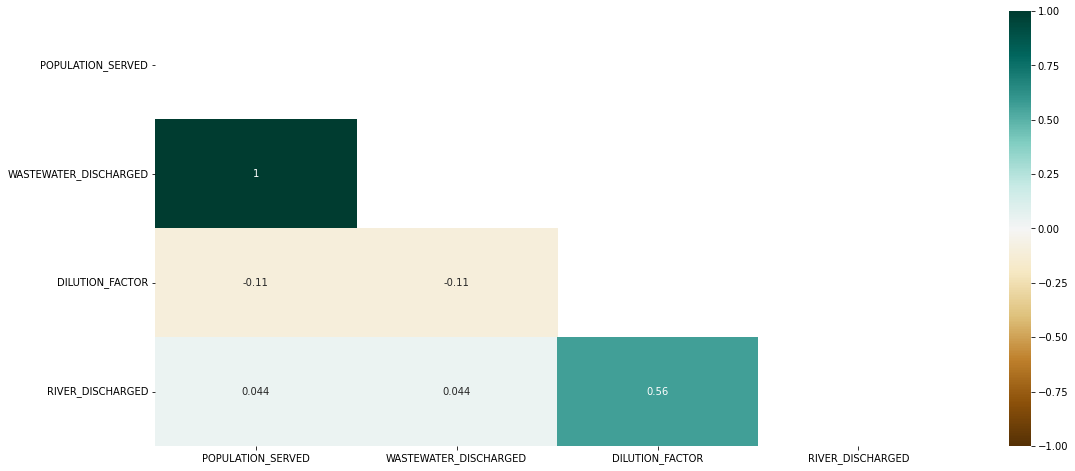

In [19]:
plt.figure(figsize= (18, 8)) # Setting the size and ration of the visual

mask= np.triu(np.ones_like(StatsDataframe[['POPULATION_SERVED', 'WASTEWATER_DISCHARGED', 'DILUTION_FACTOR', 'RIVER_DISCHARGED']
                                          ].corr(), dtype=bool)) # Generating a mask for the upper triangle
                                          
# Setting a range of values from -1 to 1 and the annotation to True to display the correlation values on the heatmap.
sns.heatmap(StatsDataframe[['POPULATION_SERVED', 'WASTEWATER_DISCHARGED', 'DILUTION_FACTOR', 'RIVER_DISCHARGED']
                          ].corr(), mask= mask, vmin= -1, vmax= 1, annot= True, cmap= 'BrBG')

COMMENT OF RESULTS:
>*   Levels of treated-wastewater discharge are in perfect correlation with sizes of population served by each WWTP. But this is explained by the attribute being a population-based estimation made by Ehalt Macedo, et al. (2022, see section 2.1.4) to fix missing reported data issues and ensure consistency throughout the dataframe.
>*   The dilution factor, on the other hand, has some correlation with river discharges, as it increases more rapidly as more m3 of water flows through the rivers than with treated wastewater discharged into them.


# **5.0 Regional Analysis**
---




In this section, I will use geospatial analysis and data visualisation techniques to assess the distribution of the population connected to the wastewater management network in Ukraine and examine the hydrographic scenario to understand the impacts on water availability and contamination risks. My analysis will also provide insights into the management of water resources and the expansion of infrastructure.

### 5.1 Population Distribution

First, I must analyse the distribution of the population connected to the wastewater management network in order to identify areas that are likely to have the highest demand for wastewater treatment services and may need additional resources or infrastructure to accommodate this demand.

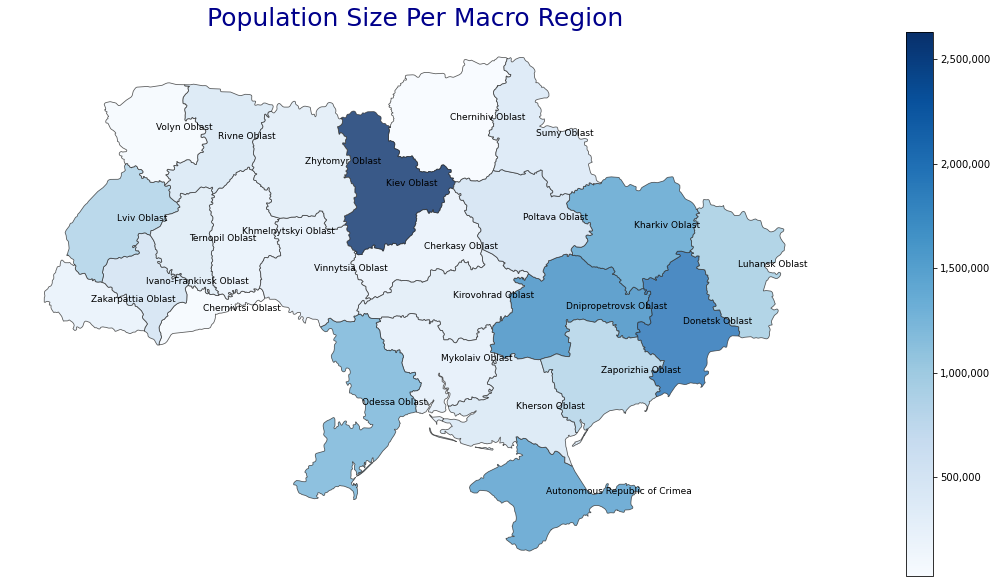

In [20]:
# Creating figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
GeoJoin_Sum.plot(ax=ax, column='POPULATION_SERVED', cmap='Blues', alpha=0.8, linewidth=0.8, edgecolor='0.2')

# Adding title and labels with the names of each region
ax.set_title("Population Size Per Macro Region", fontsize=25, color='DarkBlue')
for index, row in GeoJoin_Sum.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=9)

# Creating colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(
                                            vmin=GeoJoin_Sum['POPULATION_SERVED'].min() ,
                                            vmax=GeoJoin_Sum['POPULATION_SERVED'].max() ))
sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # adding the colorbar to the figure
ax.axis('off') # removing the axis

# Formating the tick labels on the colorbar
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
cbar.ax.yaxis.set_major_formatter(formatter)

The map reveals that the majority of the connected population is concentrated in the southern and eastern regions, with a few clusters located in other macro-regions. However, it is currently unclear what proportion of the total population these regions represent. Further data querying should provide answers to these questions and others.

In [21]:
# QUERY 1:WHAT IS THE TOTAL POPULATION SERVED IN UKRAINE?
query1 = GeoJoin_Sum.assign(region='Ukraine')
query1 = query1.groupby('region')['POPULATION_SERVED'].sum()
query1 = query1.reset_index().rename(columns={'region': 'name'})
query1 = query1.assign(QUERY='Total population of the WWTP network:')
#__________________________________________________________________________________________
# QUERY 2: WHAT IS THE SUMMED POPULATION OF ALL EASTERN MACROREGIONS?
query2 = GeoJoin_Sum.loc[GeoJoin_Sum['name'].isin(
                          ['Dnipropetrovsk Oblast', 'Kharkiv Oblast', 'Donetsk Oblast', 'Luhansk Oblast'])].assign(region='East Regions')
query2 = query2.groupby('region')['POPULATION_SERVED'].sum()
query2 = query2.reset_index().rename(columns={'region': 'name'}).assign(QUERY='Total population of the east Ukraine:')
#__________________________________________________________________________________________
# QUERY 3: AND WHAT ABOUT THE WHOLE SOUTHERN REGION?
query3 = GeoJoin_Sum.loc[GeoJoin_Sum['name'].isin(['Odessa Oblast', 'Mykolaiv Oblast', 'Kherson Oblast',
                                                   'Autonomous Republic of Crimea', 'Zaporizhia Oblast'])].assign(region='South Regions')
query3 = query3.groupby('region')['POPULATION_SERVED'].sum()
query3 = query3.reset_index().rename(columns={'region': 'name'}).assign(QUERY='Total population of the south Ukraine:')
#__________________________________________________________________________________________
# QUERY 4: WHICH MACROREGION HAS THE HIGHEST POPULATION SERVED?
query4 = GeoJoin_Sum[GeoJoin_Sum.POPULATION_SERVED == GeoJoin_Sum.POPULATION_SERVED.max()]
query4 = query4.assign(QUERY="Country's most populous macroregion:")
#__________________________________________________________________________________________
# QUERY 5: WHAT IS THE MOST POPULOUS MACROREGION IN WESTERN UKRAINE?
query5 = GeoJoin_Sum[GeoJoin_Sum.name == 'Lviv Oblast']
query5 = query5.assign(QUERY='Largest concentration in western Ukraine:')
#__________________________________________________________________________________________
# Stacking the dataframes
queries = pd.concat([query1, query2, query3, query4, query5])

# Creating a PERCENTAGE_SERVED column
total_population = GeoJoin_Sum['POPULATION_SERVED'].sum()
queries = queries.assign(PERCENTAGE_SERVED=queries['POPULATION_SERVED'].apply(lambda x: (x / total_population) * 100 )).round(1)

# Formatting the values in the POPULATION_SERVED column with commas as thousand separators
queries['POPULATION_SERVED'] = queries['POPULATION_SERVED'].apply(lambda x: "{:,}".format(x)) 

# Printing the results
queries[['QUERY', 'name', 'POPULATION_SERVED', 'PERCENTAGE_SERVED']]

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,QUERY,name,POPULATION_SERVED,PERCENTAGE_SERVED
0,Total population of the WWTP network:,Ukraine,"18,401,273",100.0
0,Total population of the east Ukraine:,East Regions,"6,200,141",33.7
0,Total population of the south Ukraine:,South Regions,"4,452,097",24.2
10,Country's most populous macroregion:,Kiev Oblast,"2,628,658",14.3
13,Largest concentration in western Ukraine:,Lviv Oblast,"893,898",4.9


COMMENT ON RESULTS:

>*   From all the insights observed, it is clear that the eastern and southern regions of Ukraine are integral parts of the WWTP network, serving together over half of the total connected population.  These regions are crucial to the proper functioning of the network and their importance cannot be overstated.

>*   On the other side of Ukraine, the Kiev Oblast, home of the capital city Kiev and located in the north, serves alone 14.4% of the population. And the Lviv Oblast, while not as crowded, still plays a significant role in the west, serving nearly 5% of the total network.

>*   In short, these mentioned regions together account for nearly 75% of the connected population, highlighting the vital role they play in serving the needs of the country.

### 5.2 Hydrographic Scenario

Ukraine's river network is composed of several major rivers, including the Danube, Dniester, Western and Southern Bugs, Dnipro, and Donets. These rivers flow predominantly southward through various regions of the country, ultimately emptying into the Black Sea and the Sea of Azov. ([For more information, see the provided link](https://en.wikipedia.org/wiki/List_of_longest_rivers_of_Ukraine#:~:text=The%20most%20notable%20rivers%20of,the%20main%20river%20within%20Ukraine).)

With that said, it is important to analyze the strength of river volume in the outfall areas of the WWTP network in order to understand the availability of water and contamination risks in different regions of the country. This data can inform decision-making regarding the management of water resources and the expansion of wastewater treatment infrastructure.

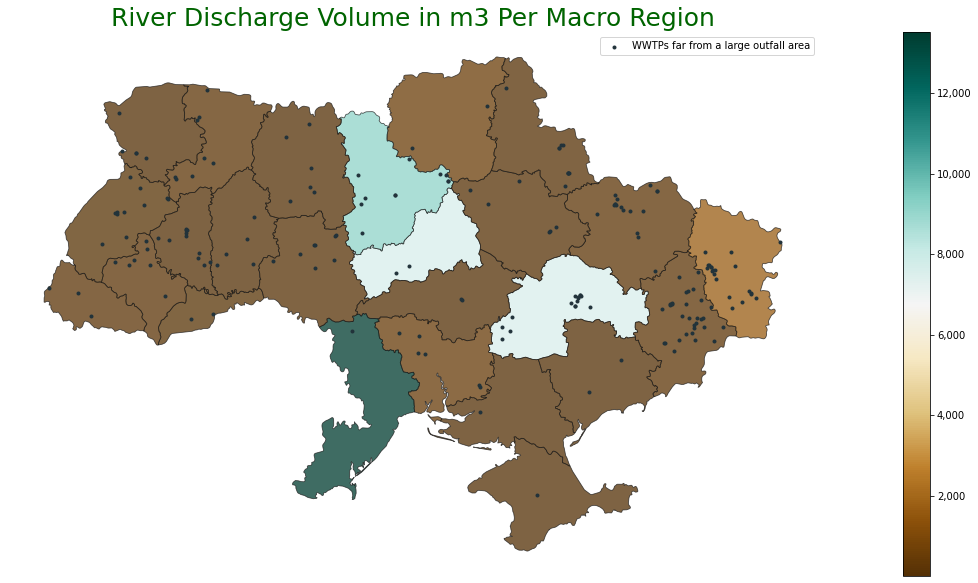

In [22]:
# Generating a choropleth map
fig, ax = plt.subplots(1, figsize=(30, 10))
GeoJoin_Sum.plot(ax=ax, column='RIVER_DISCHARGED', cmap='BrBG', alpha=0.75, linewidth=0.8, edgecolor='0.1')

ax.set_title("River Discharge Volume in m3 Per Macro Region", fontsize=25, color='DarkGreen') # Adding the visual title
sm = plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin=GeoJoin_Sum['RIVER_DISCHARGED'].min(), # Creating colorbar as a legend
                                                           vmax=GeoJoin_Sum['RIVER_DISCHARGED'].max()))
sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # adding the colorbar to the figure
ax.axis('off') # removing the axis

# Formating the tick labels on the colorbar
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
cbar.ax.yaxis.set_major_formatter(formatter)

# Generating a scatter plot on top of the basemap
Dataframe[Dataframe['COASTAL_DISTANCE'] == 'Far'].plot(ax=ax, color='#22333B', marker='.', label='WWTPs far from a large outfall area')
ax.legend() # Add a legend and show the plot
plt.show()

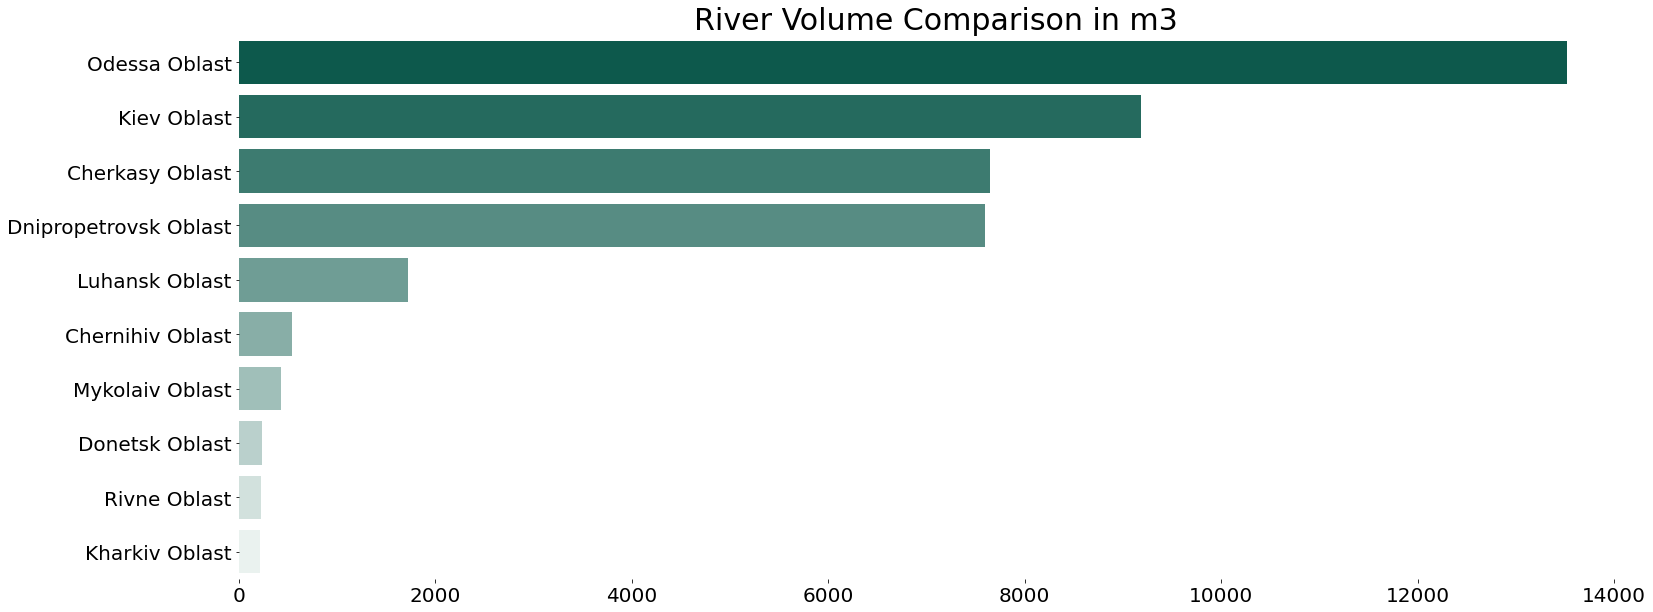

In [23]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=GeoJoin_Sum['RIVER_DISCHARGED'], y='name', data=GeoJoin_Sum.nlargest(10, 'RIVER_DISCHARGED'), color='g', palette='light:#065_r')

# Customizing the visual
sns.set_theme(style="whitegrid") # background style
plt.title('River Volume Comparison in m3', fontsize=30) # setting title
plt.tick_params(axis='both', which='major', labelsize=20) # setting label font sizes
ax.set(ylabel='', xlabel='') # no labels
sns.despine(left=True, bottom=True) # less grids

COMMENT ON RESULTS:

>*   It is interesting to note that Odesa Oblast has the highest river discharge volume in Ukraine, likely due to its proximity to the Danube river, which is the second-longest river in Europe and may have a larger volume of water compared to other rivers in the country.

>*   Kyiv Oblast, Cherkasy, and Dnipropetrovsk Oblasts also have significant volumes of river discharge thanks to the Dnipro river, which is the one of the longests river in Europe and the longest river in Ukraine.

>*   However, all other macro-regions have much lower values, which suggests that these regions may struggle more with water availability, especially if they have higher populations.

It is noteworthy that the WWTPs *far* from large outfall areas not only serve over half the network's population but are also located in regions with low river volumes, which could pose additional challenges in terms of accessing adequate water resources for treatment purposes. And table below can demonstrate why.

In [24]:
Dataframe[['COASTAL_DISTANCE', 'POPULATION_SERVED', 'WASTEWATER_DISCHARGED', 'RIVER_DISCHARGED' , 'DILUTION_FACTOR']
          ].fillna(0).groupby('COASTAL_DISTANCE').agg('mean').astype(int) # retrieving the average value for each selected attribute

,POPULATION_SERVED,WASTEWATER_DISCHARGED,RIVER_DISCHARGED,DILUTION_FACTOR
COASTAL_DISTANCE,,,,
Close,62437,5195,0,0
Far,52962,4407,48,2717
Midrange,77543,6452,602,73335


The results show that outfall areas located within 10 to 50 km of larger bodies of water benefit from an average volume of river flow 12 times greater than those located further away. Tipically, this  could be because rivers closer to the coast or large lakes are fed by larger watersheds, which means they have more water flowing into them from tributaries and other sources. So, this can be impacting on the dilution levels of treated-wastewater discharges into those rivers, which are washed away to the large water bodies more quickly.

### 5.3 Contamination Risk


According to [Ehalt Macedo, et al. (2022, section 2.1.4)](https://essd.copernicus.org/articles/14/559/2022/#section4), the minimum dilution factor (DF) recommended by the European Medicines Agency (EMA) for environmental risk assessments of medicinal products for human use is 10. However, in reality lots of streams receive wastewater in higher volumes than what they can carry away, representing often DF values equal or lower than the reccomended treshhold.

That said, I categorized these WWTPs according to their contamination risk levels in order to identify those with the greatest risk to the population served due to low dilution factors (DF). And the results indicate that 7% of the plants have a very high potential for wastewater contamination, while an additional 23% are also in high risk conditions despite meeting regulatory requirements. This means that almost one-third of all Ukrainian WWTPs may be struggling to effectively dilute their treated wastewater into their designated discharge points. And once the contamination enters the river network it continues to flow downstream, potentially accumulating with other contaminants from multiple sources along the way, to sometimes deleterious effects (UNEP, 2016; van Vliet et al., 2021).

In [25]:
# Binning the DF based on specific conditions
Dataframe['CONTAMINATION_RISK'] = Dataframe['DILUTION_FACTOR'].apply(lambda x: 'Very High'   if x <10
                                                                          else 'High'        if x >= 10  and x <= 100
                                                                          else 'Acceptable'  if x >= 101  and x <= 50_000
                                                                          else 'Sustainable' if x >= 50_001
                                                                          else 'Near Outfall Area')
# Grouping the DataFrame by the 'RISK_GROUP' column and aggregating the other variables
Dataframe.groupby('CONTAMINATION_RISK'
                 ).agg({'CONTAMINATION_RISK': 'count', 'RIVER_DISCHARGED': 'sum', 'WASTEWATER_DISCHARGED': 'sum', 'DILUTION_FACTOR': 'mean'}
                 ).rename(columns={'CONTAMINATION_RISK': 'Count Of WWTPs', 'DILUTION_FACTOR': 'Average Dilution Factor',
                                   'RIVER_DISCHARGED': 'Total River Discharge', 'WASTEWATER_DISCHARGED': 'Total Treated-Wasterwater Discharge'}
                 ).sort_values('Average Dilution Factor').round(1)

,Count Of WWTPs,Total River Discharge,Total Treated-Wasterwater Discharge,Average Dilution Factor
CONTAMINATION_RISK,,,,
Very High,23,10.7,194572.6,5.6
High,73,197.9,525491.4,46.2
Acceptable,139,13215.4,478818.6,2640.6
Sustainable,15,29103.5,15449.2,279524.6
Near Outfall Area,61,0.0,316940.4,NaN


I feel like I am starting to get to the heart of the issue. So, in order to further analyze the situation, I plan to map out the location of these critical WWTPs and see how they relate to population distribution, dilution factor, and river discharge. To do this, I will use the Risk Score I developed that combines all of these attributes into one measure. And by doing this, I will not only be able to identify the WWTPs with the lowest dilution factors, but also correlate them with the macro-regions with the highest risk scores.

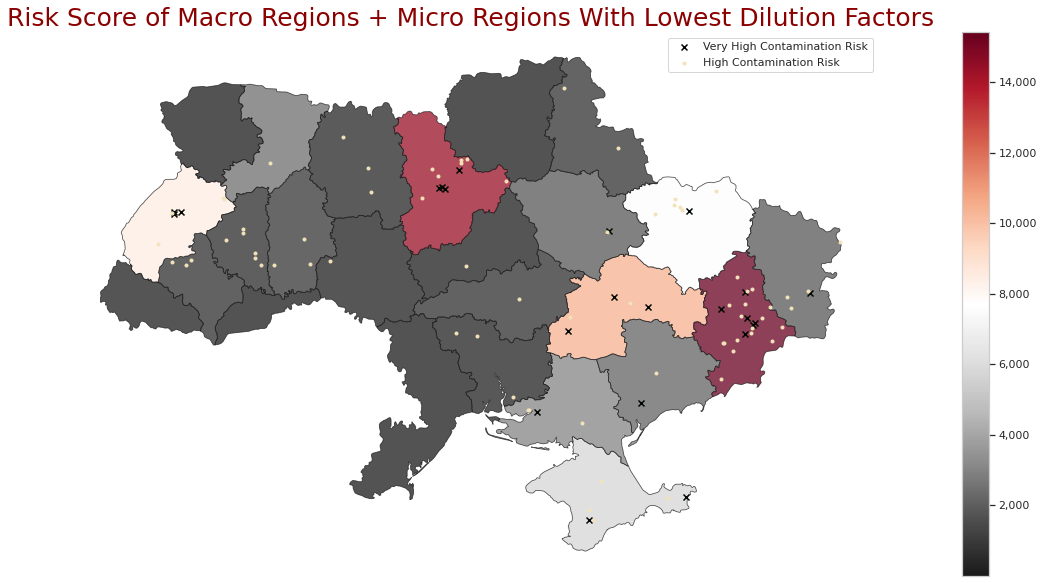

In [26]:
fig, ax = plt.subplots(1, figsize=(30, 10)) # Creating figure and axes for Matplotlib
GeoJoin_Sum.plot(ax=ax, column='RISK_SCORE', cmap='RdGy_r', alpha=0.75, linewidth=0.8, edgecolor='0.1') # Plotting the map
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=plt.Normalize(vmin=GeoJoin_Sum['RISK_SCORE'].min(), vmax=GeoJoin_Sum['RISK_SCORE'].max())) # Creating colorbar as a legend
sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # adding the colorbar to the figure
ax.axis('off') # removing the axis
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)) # 1.1 Formating the tick labels on the colorbar
cbar.ax.yaxis.set_major_formatter(formatter) # 1.2 Formating the tick labels on the colorbar

# Createing a scatter plot on top of the basemap, with the two WWTP groups with lowest dilution factors 
df1=Dataframe[Dataframe.CONTAMINATION_RISK == 'Very High']
plt.scatter(df1['LONGITUDE_WWTP'],df1['LATITUDE_WWTP'], color='#010801', marker= 'x', label='Very High Contamination Risk')
df2=Dataframe[Dataframe.CONTAMINATION_RISK == 'High']
plt.scatter(df2['LONGITUDE_WWTP'],df2['LATITUDE_WWTP'], color='#F3E3BA', marker= '.', label='High Contamination Risk')

# Add a legend and show the plot
ax.set_title("Risk Score of Macro Regions + Micro Regions With Lowest Dilution Factors", fontsize=25, color='DarkRed')
ax.legend()
plt.show()

COMMENT ON RESULTS:

>*   Donetsk and Kyiv have the highest risk scores and the largest counts of WWTPs with high and very high potentials for wastewater contamination.

>*   Dnipropetrovsk, Lviv, and Kharkiv also have high risk scores, as well as some of their surrounding oblasts.

>*   WWTPs with high potentials for contamination, on the other hand, are dispersed throughout the western and eastern regions, which also happen to have the lowest water discharge volumes (as shown on the previous map).

In summary, this map reveals a regional trend towards certain areas of Ukraine, particularly the eastern and southeastern regions, with the oblasts of Donetsk, Dnipropetrovsk, and Kharkiv standing out, and a few exceptions such as Kyiv and Lviv in other areas.

### 5.4 Action Plan

Due to possibly limited resources available to public authorities, it is essential to implement an action plan focusing on four specific initiatives to effectively address the issue of wastewater contamination in Ukraine.

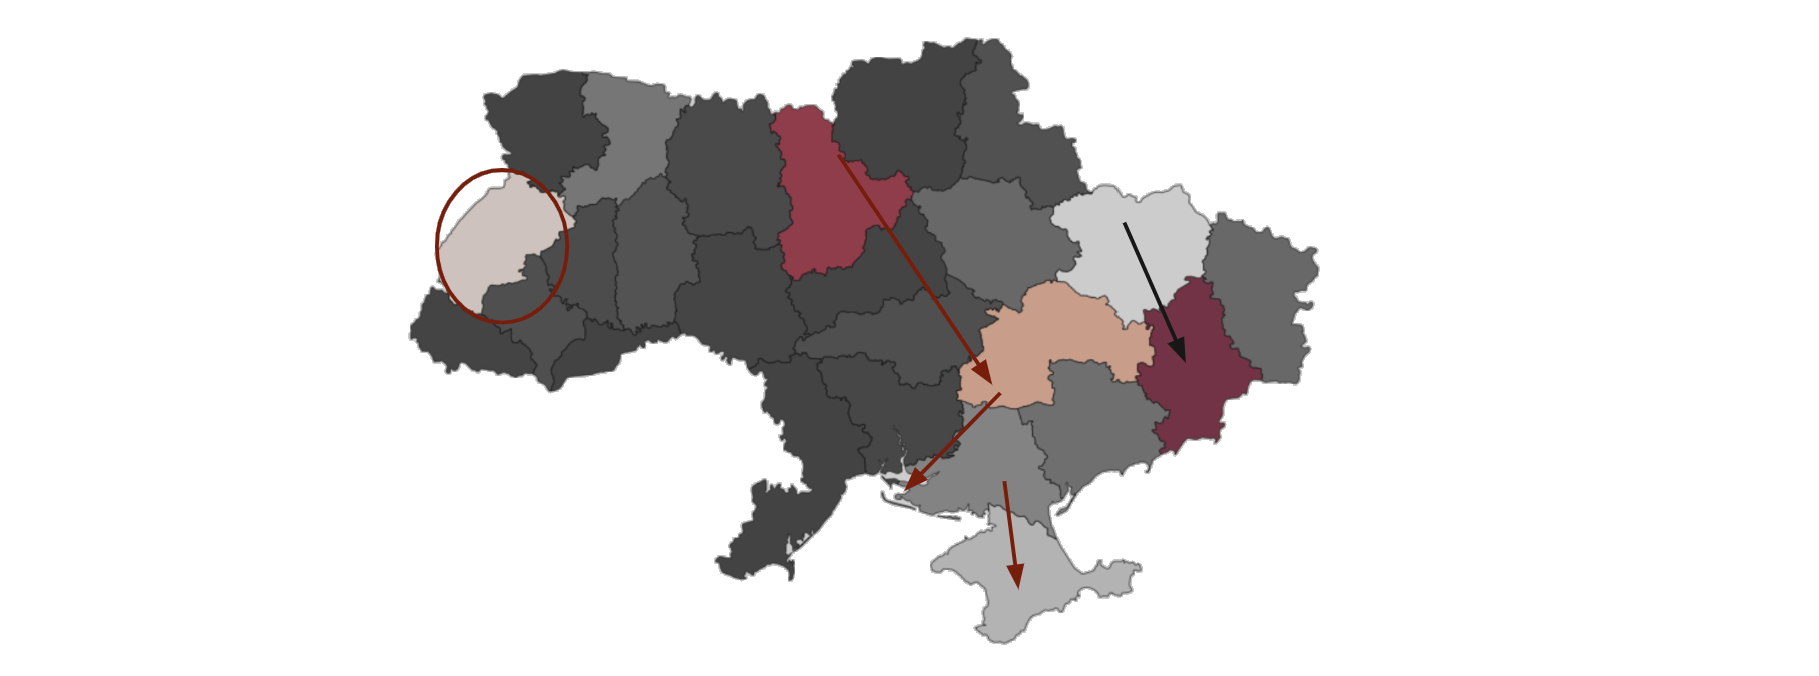

>* **Initiative 1: From Kharkiv to Donetsk along the river Donets**

The river Donets flows through the oblasts of Kharkiv, Donetsk, and several others in eastern Ukraine. This region has been identified as having a high risk for wastewater contamination due to the high number of WWTPs with high or very high potentials for contamination located in Kharkiv and Donetsk. Therefore, prioritising resources along this stretch of the river is crucial in order to mitigate the potential for contamination and protect public health. The river Donets is a tributary of the river Seversky Donets and has a total length of 1,051 kilometers.

>* **Initiative 2: From Kyiv through Dnipropetrovsk to Kherson along the river Dnipro**

The river Dnipro flows through the oblasts of Kyiv, Dnipropetrovsk, and Kherson, as well as several others in central and southern Ukraine. This region has also been identified as having a high risk for wastewater contamination, particularly in Kyiv and Dnipropetrovsk. Allocating resources along this stretch of the river will be important in addressing any potential contamination issues acumulating downstream. The river Dnipro is Ukraine's main river in Europe and has a total length of 2,285 kilometers.

>* **Initiative 3: From Kherson to Crimea through the North Crimean Canal**

The North Crimean Canal is a man-made waterway that runs from Kherson to Crimea and supplies most of the micro-regions located far from the coast. Therefore, although this region may not have as high of a risk for wastewater contamination as some of the other areas, it can still benefit from improvements made in the lower Dnipro river in Kherson Oblast.

>* **Initiative 4: Lviv, as an exception due to its highly concentrated population in the west and high contamination risk**

Although the river that flows through Lviv does not flow southward, this oblast has been identified as having a high potential for wastewater contamination due to its high population concentration in western Ukraine.

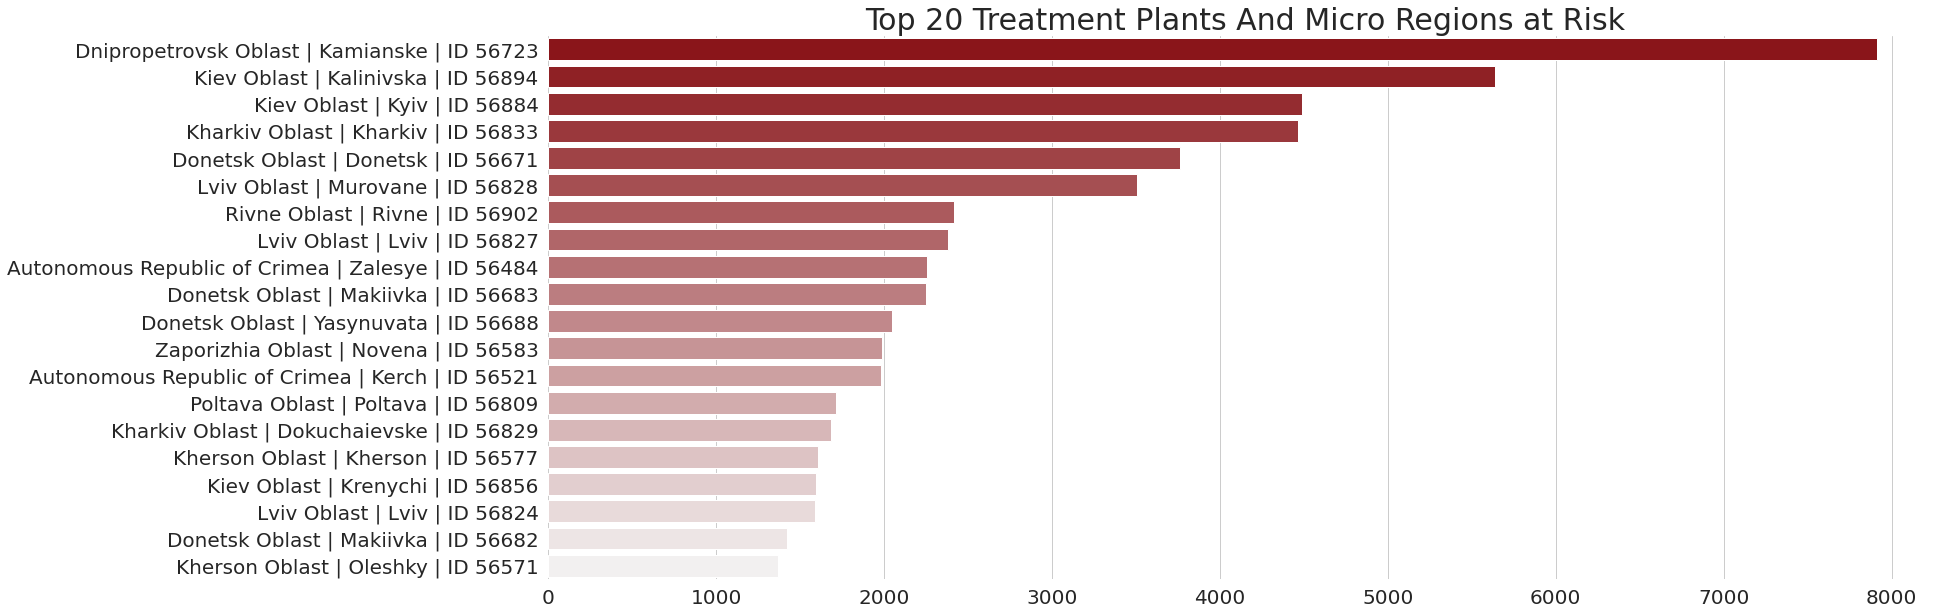

In [27]:
pd.options.mode.chained_assignment = None # line code to ignore unnecessary warning messages
# Some manual translations of 2 localization results that were generated in the Ukrainian language
Dataframe['MICROREGION'][Dataframe['WWTP_ID'] == 56583] = 'Novena'
Dataframe['MICROREGION'][Dataframe['WWTP_ID'] == 56894] = 'Kalinivska'
# Plotting a bar chart with the risk score, location information and identification number of the top 20 WWTPs at risk
f, ax = plt.subplots(figsize=(25, 10))
Dataframe['y_axis'] = Dataframe['MACROREGION'] +' | '+ Dataframe['MICROREGION'] +' | ID '+ Dataframe['WWTP_ID'].astype(str)
sns.barplot(x=Dataframe['RISK_SCORE'], y='y_axis', data=Dataframe.nlargest(20, 'RISK_SCORE'), color='g', palette='light:#9D0208_r')

# Customizing the visual
sns.set_theme(style="whitegrid") # background style
plt.title('Top 20 Treatment Plants And Micro Regions at Risk', fontsize=30) # setting title
plt.tick_params(axis='both', which='major', labelsize=20) # setting label font sizes
ax.set(ylabel='', xlabel='') # no xy labels
sns.despine(left=True, bottom=True) # less grids

In addition, the ranking displayed in the bar chart above reveals the WWTPs with the highest risk scores and should therefore be prioritized at a micro regional level when fitting them into each of the initiatives listed previously.

# **6.0 Conclusion**
---




In conclusion, this geospatial data analysis has provided important insights into the distribution of the population connected to the wastewater management network in Ukraine and the hydrographic scenario of the country.

Through the use of maps and other data visualizations, I could identify key trends and insights, such as that the eastern and southern regions are major parts of the network, serving over half of the country's population, and that the Odesa Oblast has the highest river discharge volume followed by Kyiv Oblast, Cherkasy, and Dnipropetrovsk through the Dnipro river. And most important of all, I have identified major regions like Donetsk and Kyiv that are in a critical state of need of resources and support for the proper functioning of public health and the maintenance of access to clean, safe water for its people. So, these findings have implications for the management of water resources and the expansion of wastewater treatment infrastructure in Ukraine and can inform decision-making in these areas. 

Overall, this project has also demonstrated the usefulness of Python and geospatial analysis in understanding complex systems and supporting data-driven decision-making in projects of public utility.

# **7.0 References**
---




*   Lee, Morris (2022). Ukraine Waste Water Treatment Plants [Data set]. Retrieved from https://www.kaggle.com/datasets/leekahwin/ukraine-waste-water-treatment-plants
*   Ehalt Macedo, H., Lehner, B., Nicell, J., Grill, G., Li, J., Limtong, A., and Shakya, R.: Distribution and characteristics of wastewater treatment plants within the global river network, Earth Syst. Sci. Data, 14, 559–577, https://doi.org/10.5194/essd-14-559-2022, 2022.
*   Environmental Medicines Agency (EMA): Guideline on the environmental risk assessment of medicinal products for human use: available at: https://www.ema.europa.eu/en/environmental-risk-assessment-medicinal-products-human-use#current-version-section (last access: December 2019), 2006. 
*   United Nations Environment Programme (UNEP): A Snapshot of the World's Water Quality: Towards a global assessment, United Nations Environment Programme, Nairobi, Kenya, 162 pp., 2016.

I am also making the files below available for download for whoever decides do import this notebook. One thing to note, though, you would then have to get your own access token from Kaggle to be able to use the API and pull the data from their servers.

In [28]:
Dataframe.to_csv('Dataframe.csv')
GeoJoin_Sum.to_csv('GeoJoin_Sum.csv')
Basemap.to_csv('Basemap.csv')